In [1]:
# Date,Max_Temperature,Min_Temperature,Humidity,Rainfall,Dengue_Cases,Population,Population_Density,Altitude,Health_Facilities,Mosquito_Abundance
# 2023-01-01,30,22,75,5,10,500000,250,100,20,150

import pandas as pd
from faker import Faker
import random

# Create a Faker instance
fake = Faker()

# Define the number of records
num_records = 1000

# Define column names
column_names = ['Date', 'Max_Temperature', 'Min_Temperature', 'Humidity', 'Rainfall', 'Dengue_Cases',
                'Population', 'Population_Density', 'Altitude', 'Health_Facilities', 'Mosquito_Abundance']

# Create an empty list to store records
records = []

# Generate synthetic data
for _ in range(num_records):
    record = {
        'Date': fake.date_this_decade(),
        'Max_Temperature': random.randint(20, 40),
        'Min_Temperature': random.randint(10, 30),
        'Humidity': random.randint(50, 90),
        'Rainfall': random.randint(0, 20),
        'Dengue_Cases': random.randint(0, 50),
        'Population': random.randint(100000, 1000000),
        'Population_Density': random.randint(50, 500),
        'Altitude': random.randint(0, 1000),
        'Health_Facilities': random.randint(1, 50),
        'Mosquito_Abundance': random.randint(50, 200)
    }
    records.append(record)

# Create a DataFrame by concatenating the list of records
df = pd.concat([pd.DataFrame([record]) for record in records], ignore_index=True)

# Save the generated dataset to a CSV file
df.to_csv('synthetic_dengue_data.csv', index=False)

# Display the first few rows of the generated dataset
print(df.head())


         Date  Max_Temperature  Min_Temperature  Humidity  Rainfall  \
0  2023-09-29               25               14        56         3   
1  2021-11-14               28               24        80        13   
2  2020-10-21               27               11        79        10   
3  2022-09-08               30               23        83         6   
4  2021-01-02               25               17        90         8   

   Dengue_Cases  Population  Population_Density  Altitude  Health_Facilities  \
0            23      132580                 495       861                 45   
1             4      960857                 111       112                 41   
2            15      386445                 226       990                 32   
3            35      610273                 289       266                  4   
4            26      936609                 153       374                 19   

   Mosquito_Abundance  
0                  87  
1                 164  
2                 13

Mean Squared Error: 220.82182405355755
R-squared: -0.027617870284244894


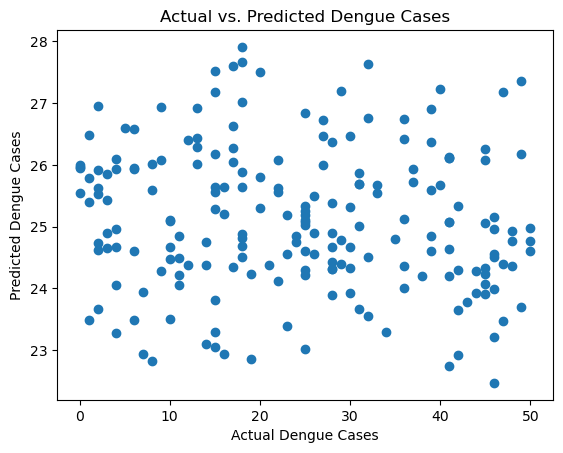

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the synthetic dataset from the CSV file
df = pd.read_csv('synthetic_dengue_data.csv')

# Drop the 'Date' column for simplicity in this example
df = df.drop(['Date'], axis=1)

# Split the data into features (X) and target variable (y)
X = df.drop('Dengue_Cases', axis=1)
y = df['Dengue_Cases']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the predictions
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Dengue Cases')
plt.ylabel('Predicted Dengue Cases')
plt.title('Actual vs. Predicted Dengue Cases')
plt.show()


In [15]:
import joblib

# Save the model
model_filename = 'dengue_prediction_model.joblib'
joblib.dump(model, model_filename)


['dengue_prediction_model.joblib']

In [16]:
# Load the model
loaded_model = joblib.load(model_filename) 

In [17]:
# Prepare new data for prediction
new_data = {
    'Max_Temperature': 27,
    'Min_Temperature': 18,
    'Humidity': 70,
    'Rainfall': 5,
    'Population': 800000,
    'Population_Density': 300,
    'Altitude': 500,
    'Health_Facilities': 15,
    'Mosquito_Abundance': 120
}

# Convert the new data to a DataFrame
new_df = pd.DataFrame([new_data])

# Make predictions with the loaded model
new_predictions = loaded_model.predict(new_df)

# Print the predicted Dengue Cases
print(f'Predicted Dengue Cases: {new_predictions[0]}')


Predicted Dengue Cases: 24.593617551270423


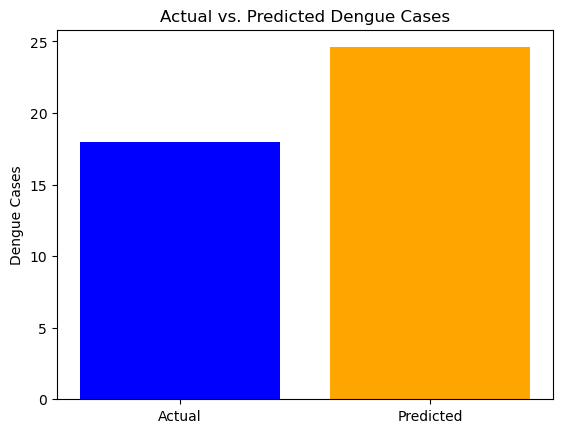

In [18]:
import matplotlib.pyplot as plt

# Assuming 'new_predictions' contains the predicted Dengue Cases
# Assuming 'y_test' contains the actual Dengue Cases for comparison

# Plotting the actual and predicted values
plt.bar(['Actual', 'Predicted'], [y_test.iloc[0], new_predictions[0]], color=['blue', 'orange'])
plt.ylabel('Dengue Cases')
plt.title('Actual vs. Predicted Dengue Cases')
plt.show()


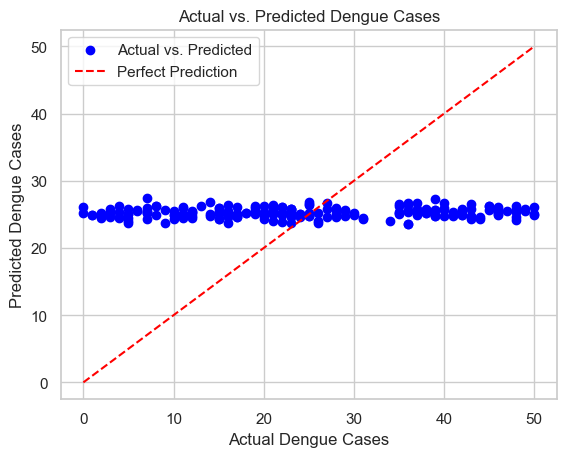

In [4]:
# Visualize the predictions with different plot styles
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Dengue Cases')
plt.ylabel('Predicted Dengue Cases')
plt.title('Actual vs. Predicted Dengue Cases')
plt.legend()
plt.show()


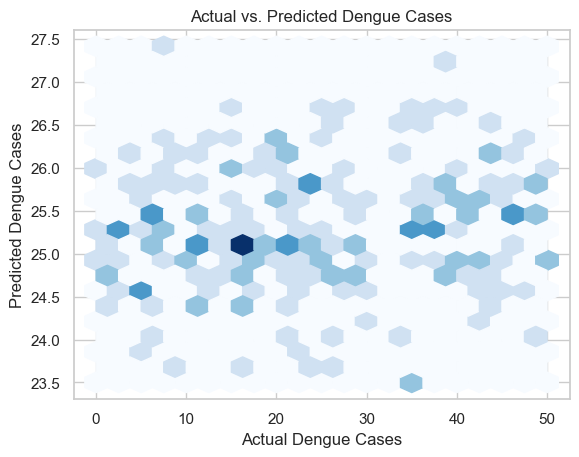

In [9]:
plt.hexbin(y_test, y_pred, gridsize=20, cmap='Blues')
plt.xlabel('Actual Dengue Cases')
plt.ylabel('Predicted Dengue Cases')
plt.title('Actual vs. Predicted Dengue Cases')
plt.show()


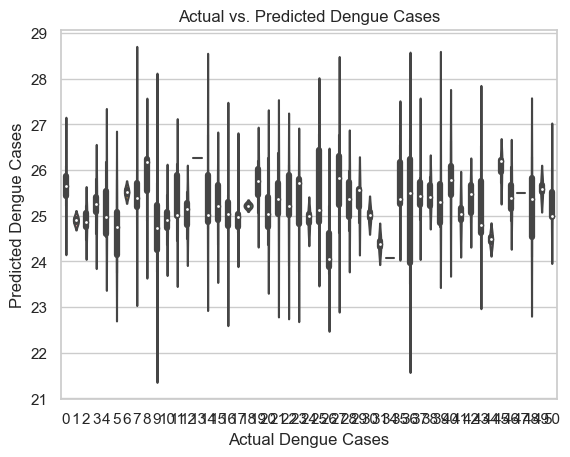

In [6]:
import seaborn as sns

sns.violinplot(x=y_test, y=y_pred)
plt.xlabel('Actual Dengue Cases')
plt.ylabel('Predicted Dengue Cases')
plt.title('Actual vs. Predicted Dengue Cases')
plt.show()


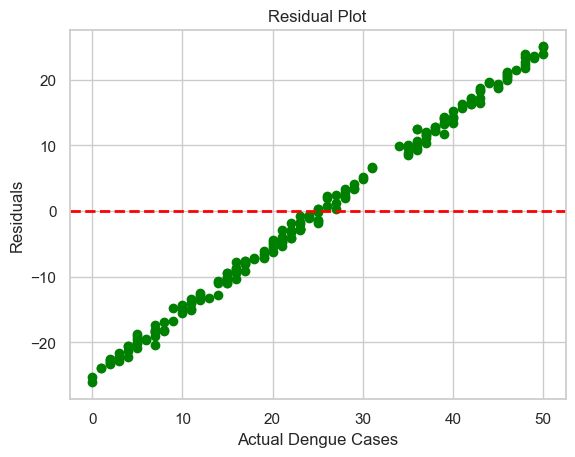

In [7]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Dengue Cases')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
